# Unsupervised Learning Using K-Means Clustering on California Housing Data

## Fetch the dataset

In [22]:
import pandas as pd
housing = pd.read_csv('datasets/housing.csv')

In [24]:
features = ['longitude', 'latitude', 'median_income']
housing_selected = housing[features]

In [25]:
housing_selected.head()

,longitude,latitude,median_income
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


## Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [27]:
scaler = StandardScaler()
housing_selected_scaled = scaler.fit_transform(housing_selected)

## Apply K-Means Clustering on the California Housing Dataset based on median_income

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
ypred = kmeans.fit(housing_selected_scaled)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Optimize the number of clusters

In [32]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [37]:
silhouette_scores = []
cluster_range = range(2, 8)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(housing_selected_scaled)  
    score = silhouette_score(housing_selected_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

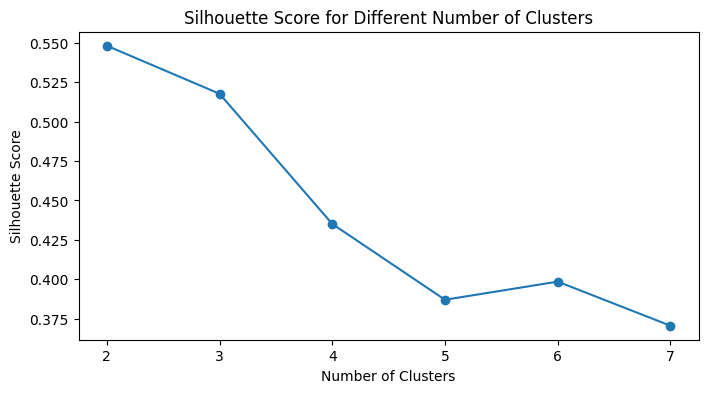

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

## Visualize the clusters

C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bademari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

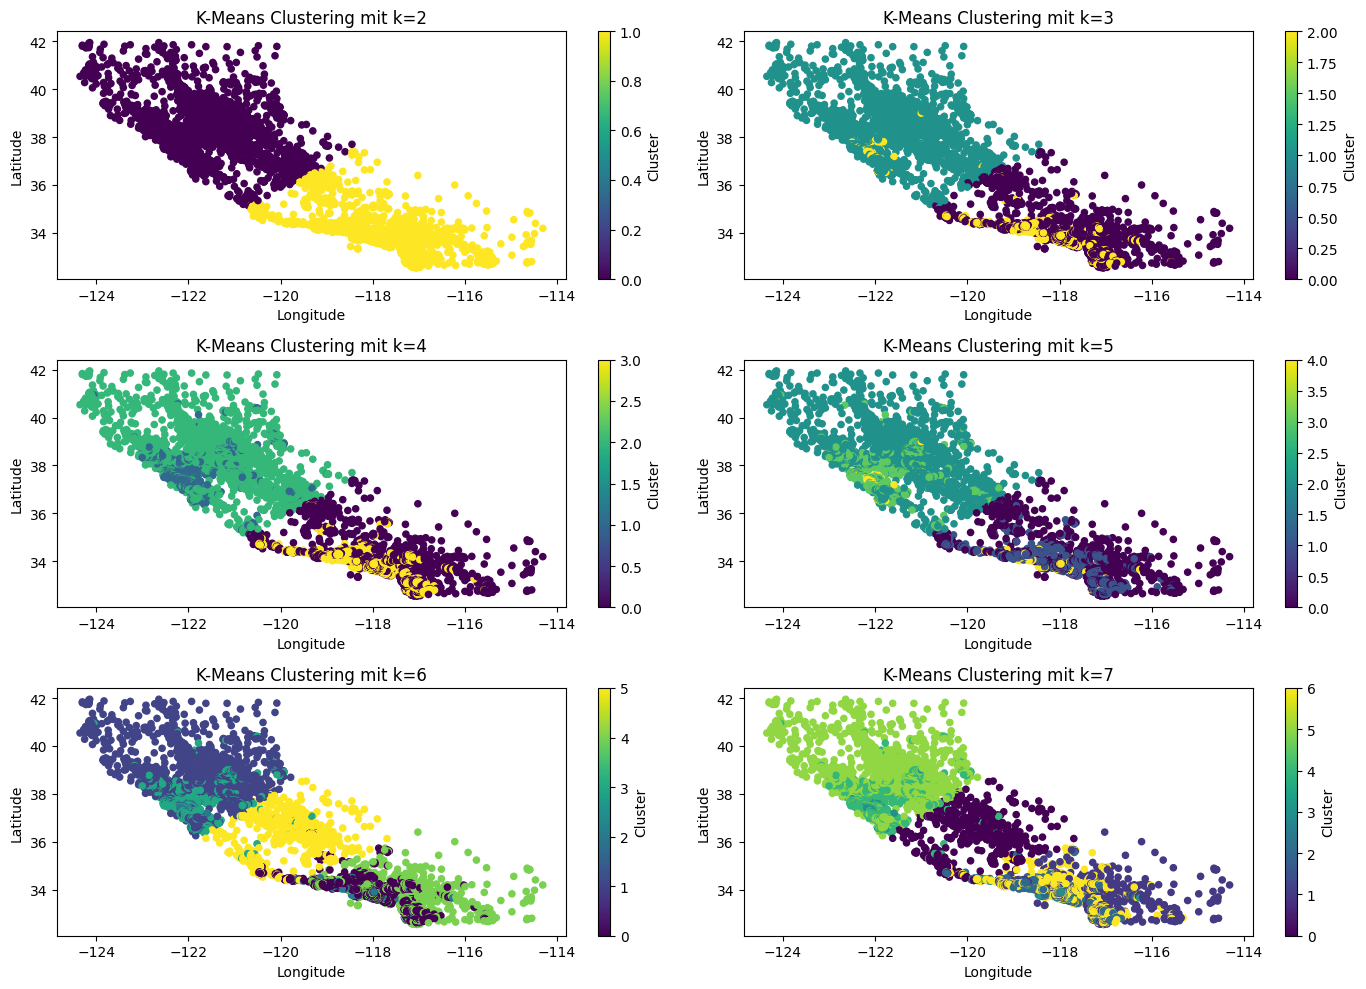

In [42]:
k_values = [2, 3, 4, 5, 6, 7]


plt.figure(figsize=(14, 10))
for i, k in enumerate(k_values, 1):
    
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(housing_selected_scaled)
    
    
    plt.subplot(3, 2, i)
    plt.scatter(housing_selected['longitude'], housing_selected['latitude'], c=clusters, cmap='viridis', s=20)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'K-Means Clustering mit k={k}')
    plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()